# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import LinearSVC

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
data = pd.read_csv(r'/content/creditcard.csv')

X = data.drop(['Class'], axis = 1)
y = data['Class']

# необходимо отмасштабировать Time & Amount

rob_scaler = RobustScaler( )
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

data_scaled = data.drop(['Time', 'Amount'], axis = 1)

# отмасштабировали Time и Amount


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



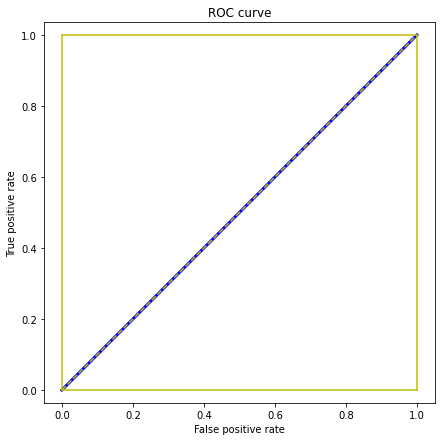

accuracy score is 0.9984129659279234
precision score is 0.0
recall score is 0.0
f1 score is 0.0
roc_auc score is 0.5


In [ ]:
# константа: фрод - 1, не фрод - 0
# всего фродов в таргете 492, всего значений в таргете 284807, т.е. скор будет хороший
# если мы просто будем для каждой транзакции говорить, что это не фрод

model_const = np.zeros(shape = len(X_test))

accuracy_const = accuracy_score(y_test, model_const)
precision_const = precision_score(y_test, model_const)
recall_const = recall_score(y_test, model_const)
f1_const = f1_score(y_test, model_const)
roc_auc_const = roc_auc_score(y_test, model_const)

metrics = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], \
                       data = [[accuracy_const, precision_const, recall_const, f1_const, roc_auc_const]])
# roc - кривая

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, model_const)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot([0, 0], [0, 1], 'y')
plt.plot([1, 1], [0, 1], 'y')
plt.plot([0, 1], [0, 0], 'y')
plt.plot([0, 1], [1, 1], 'y')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()



for item in metrics.columns:
  print('{} score is {}'.format(item, metrics[item].values[0]))

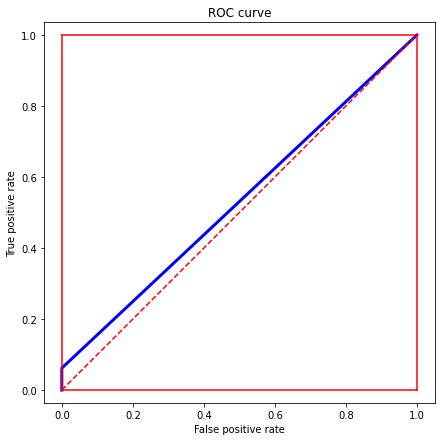

accuracy score is 0.9985112777730962
precision score is 1.0
recall score is 0.061946902654867256
f1 score is 0.11666666666666665
roc_auc score is 0.5309734513274337


In [ ]:
# KNN 

model_knn = KNeighborsClassifier( )
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0, 0], [0, 1], 'r')
plt.plot([1, 1], [0, 1], 'r')
plt.plot([0, 1], [0, 0], 'r')
plt.plot([0, 1], [1, 1], 'r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()


metrics_knn = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], \
                       data = [[accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]])

for item in metrics_knn.columns:
  print('{} score is {}'.format(item, metrics_knn[item].values[0]))


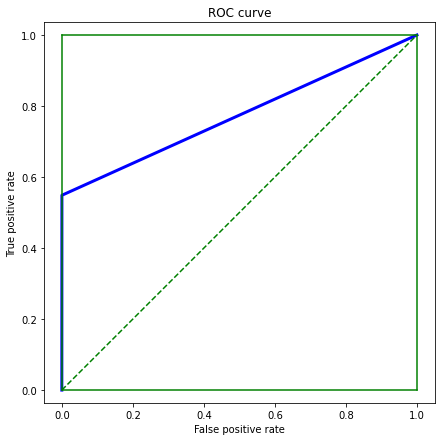

accuracy score is 0.9990590151962023
precision score is 0.7948717948717948
recall score is 0.5486725663716814
f1 score is 0.6492146596858639
roc_auc score is 0.7742237481944918


In [ ]:
# Logistic Regression

model_logreg = LogisticRegression(max_iter = 1000)
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'g--')
plt.plot([0, 0], [0, 1], 'g')
plt.plot([1, 1], [0, 1], 'g')
plt.plot([0, 1], [0, 0], 'g')
plt.plot([0, 1], [1, 1], 'g')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()


metrics_logreg = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], \
                       data = [[accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]])

for item in metrics_logreg.columns:
  print('{} score is {}'.format(item, metrics_logreg[item].values[0]))

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

In [ ]:
# нужно максимизировать полноту. нам нестрашно, если мы забаним немошенническую транзакцию, человек потом 
# позвонит в поддержку и деньги вернут, но если мы упустим мошенническую транзакцию - это будет очень плохо,
# потому что клиент лишится денег, мы потеряем клиента и будут проблемы 

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



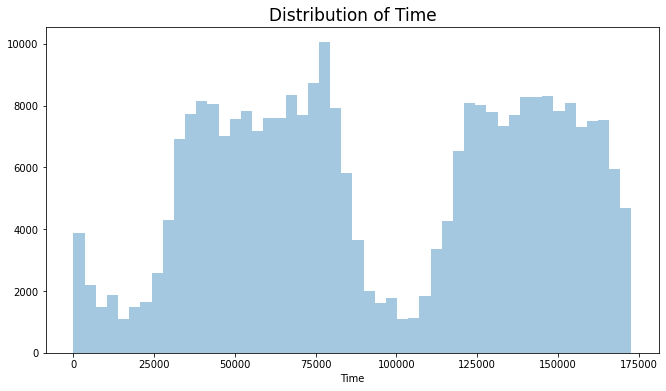

In [ ]:

plt.figure(figsize=(11,6))
sns.distplot(data['Time'],kde=False)
plt.title('Distribution of Time', fontsize=17)
plt.show()

In [ ]:
# украли 0?

data[data['Amount'] == 0]

# у нас есть странные колонки, где Amount = 0. добавим это в качестве новой фичи

data_scaled['amount0'] = np.where(data.Amount == 0, 1, 0)

Наши данные сильно несбалансированы. Это может привести к переобучению/нахождению неправильных зависимостей. Будем а) масштабировать (уже это сделали) б) делать сэмплинг (по-русски: добавлять копии к меньшему классу / уменьшать больший класс)

In [ ]:
params = [{
    'C': [0.3, 0.5, 0.7, 1],
    'penalty': ['l1','l2'],
    'class_weight':[{1:1,0:0.3},{1:1,0:0.5},{1:1,0:0.7}]
}]

clf = LogisticRegression(
    n_jobs=-1 
)

searcher = GridSearchCV(clf, param_grid = params, n_jobs=-1)
searcher.fit(X_train, y_train)
searcher.best_params

# best params C = 1, class_weight = {1: 1, 0: 0.3}, penalty = 'l1', solver = 'liblinear'

KeyboardInterrupt: ignored

In [ ]:
# Oversampling (сэмплирование меньшего класса)

from sklearn.utils import resample

y = data_scaled['Class']
X = data_scaled.drop(['Class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


not_fraud = data_scaled[data_scaled.Class==0]
fraud = data_scaled[data_scaled.Class==1]

fraud_oversampled = resample(fraud, replace=True, n_samples=len(not_fraud))

oversampled = pd.concat([not_fraud, fraud_oversampled])

y_train = oversampled['Class']
X_train = oversampled.drop(['Class'], axis = 1)

my_model = LogisticRegression(C = 1, class_weight = {1: 1, 0: 0.3}, penalty = 'l1', solver = 'liblinear')
prs = cross_val_score(my_model, X_train, y_train, cv = 5, scoring = 'recall')
print(prs.mean())
 



0.9558728874663667


In [ ]:
# получили полноту поприличнее: с 0.6 подняли до 0.956

In [ ]:
# используя SMOTE

from imblearn.over_sampling import SMOTE


y = data_scaled['Class']
X = data_scaled.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

smote = LogisticRegression(C = 1, class_weight = {1: 1, 0: 0.3}, penalty = 'l1', solver = 'liblinear').fit(X_train_sm, y_train_sm)

prs_smote = cross_val_score(smote, X_train_sm, y_train_sm, cv = 5, scoring = 'recall')


In [ ]:
# полнота стала ещё поприличнее: с 0.956 до 0.966
print(prs_smote.mean())

0.9665408333137939


По итогу полнота равна 0.966. Уверен, что можно добить ещё выше, если дольше изучить зависимости, добавить новые фичи, но мне ещё делать вторую часть со своим датасетом :( 

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

будем классифицировать тексты из sklearn.datasets 20newsgroups

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_train = fetch_20newsgroups(subset = 'train')
news_test = fetch_20newsgroups(subset = 'test')

news_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
# очищение и стоп слова

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer

def preprocessing(texts):
  stop_words = stopwords.words('english')
  preprocessing_text = []
  for i in range(len(texts)):
    text = texts[i].lower()
    text = re.sub(pattern = '[^a-z A-Z]', repl = ' ', string = text)
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if w not in stop_words]
    preprocessing_text.append(' '.join(filtered_sentence))

  return preprocessing_text # тексты приведены к нижнему регистры, удалены лишние символы
                            # и стоп слова
                  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
news_train['preprocess_data'] = preprocessing(news_train.data)
news_test['preprocess_data'] = preprocessing(news_test.data)



In [ ]:
print(news_train['preprocess_data'][0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [ ]:
# стемминг (выделение основы слова)
# ещё есть лематизация (приведение слова к начальной форме)

def stemming(texts):
  st = LancasterStemmer( )
  stemmed_text = []
  for text in texts:
    words = word_tokenize(text)
    stemmed_text.append(' '.join(st.stem(word) for word in words))
  return stemmed_text

news_train['stemming_data'] = stemming(news_train.preprocess_data)
news_test['stemming_data'] = stemming(news_test.preprocess_data)

In [ ]:
news_train['preprocess_data'][0][42:49]

'posting'

In [ ]:
news_train['stemming_data'][0][42:47]
# видим что стемминг сработал - postING превратилось в post 

'post '

Теперь переведем текст в вещественное пространство признаков


**Пробуем Bag Of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# будем пользоваться TF-IDF 
# bag of words просто возвращает матрицу, в которой  i-ой строке j-ом столбце стоит число, которое равно кол-ву слова j в документе i
# TF-IDF в отличие от bag of words позволяет узнать какие слова важные и какие менее важные

# пример bag of words
vector = CountVectorizer( )
vector.fit(['я изучаю работу с текстами', 'это пример для bag of words', 'карл у клары украл кораллы'])
poz = vector.get_feature_names() # вернет уникальные слова
poz

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['bag',
 'of',
 'words',
 'для',
 'изучаю',
 'карл',
 'клары',
 'кораллы',
 'пример',
 'работу',
 'текстами',
 'украл',
 'это']

In [ ]:
vector.transform(['я изучаю работу с текстами текстами текстами', 'это пример для для bag of words', 'карл карл карл карл карл у клары украл кораллы']).toarray()

# 3 строки - кол-во файлов (3 файла), 13 столбцов - кол-во уникальных слов (13 слов)
# если сопоставить слово в каждом файле с порядком слов в vector.get_feature_names, то мы увидим следующее:
# например, слово "текстами" в 1-ом файле: poz.index('текстами') вернёт 10, в нашей матрице 1 срока (№ текста) и 10 - ое слово равно 3.
# то есть в 1 - ом файле слово "текстами" стоит под индексом 10 (относительно массива уникальных слов) и равно 3-ём, тк в 1 - ом тексте 3 слова "текстами"




array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0],
       [1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 5, 1, 1, 0, 0, 0, 1, 0]])

In [ ]:
def convertation(vector, train, test):
  train_bag_of_words = vector.fit_transform(train)
  test_bag_of_words = vector.transform(test)
  return train_bag_of_words, test_bag_of_words

X_train_BOG, X_test_BOG = convertation(vector, news_train.data, news_test.data)

In [ ]:
X_test_BOG.shape

(7532, 130107)

In [ ]:
# применяем Bag Of Words к обработанным текстами (после очищения и стемминга)
X_train_BOG_preprocessed, X_test_BOG_preprocessed = convertation(vector, news_train.preprocess_data, news_test.preprocess_data)
X_train_BOG_stemmed, X_test_BOG_stemmed = convertation(vector, news_train.stemming_data, news_test.stemming_data)

In [ ]:
(X_train_BOG_preprocessed.shape, X_train_BOG_stemmed.shape) # снизилось со 130к до 88 к и со 130к до 61к

((11314, 88863), (11314, 61221))

**Теперь применяем TF-IDF преобразование**

$ TF(w, d) = \frac{n_i}{\sum_k{n_k}}$

$ IDF(w, D) = \log_{}(\frac{D}{w_i \subset d_i})$

TF - число вхождений слова $n_i$ в документ, $\sum_k{n_k}$ - количество слов в этом же документе

IDF - D - количество документов, ${w_i \subset d_i}$ - количество документов в которых встретилось данное слово

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vector = TfidfVectorizer( )
X_train_idf, X_test_idf = convertation(tf_idf_vector, news_train.data, news_test.data)

In [ ]:
X_train_idf_preprocess, X_test_idf_preprocess = convertation(tf_idf_vector, news_train.preprocess_data, news_test.preprocess_data)

In [ ]:
X_train_idf_stemmed, X_test_idf_stemmed = convertation(tf_idf_vector, news_train.stemming_data, news_test.stemming_data)


In [ ]:
# также передадим ngrams_range(1, 2) для того, чтобы учитывать пары слов в том числе
# ngram range нужен чтобы учитывать несколько слов, например фразеологизмы. (it's raining cats and dogs - по отдельности смысла нет,
# но если ngram_range = (1, 5), выделит полностью и мы поймем смысл)

tf_idf_ngram_vector = TfidfVectorizer(ngram_range = (1, 2))
X_train_idf_stemmed_gram, X_test_idf_stemmed_gram = convertation(tf_idf_ngram_vector, news_train.stemming_data, news_test.stemming_data)

In [ ]:
X_train_idf_stemmed_gram.shape # очень сильно увеличился размер - до 930к

(11314, 934463)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

**LogReg & SVM (SVC)**

In [ ]:
logreg = LogisticRegression(max_iter = 1500000)
linearsvc = LinearSVC(dual = True, max_iter = 1500000)

In [ ]:
X_train_BOG.shape

(11314, 130107)

In [ ]:
# смотрим результат на bag of wards
logreg.fit(X_train_BOG, news_train.target)
linearsvc.fit(X_train_BOG, news_train.target)
print('For Bag Of Words LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_BOG), news_test.target)))
print('For Bag Of Words LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_BOG), news_test.target)))
print('For Bag Of Words LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_BOG), news_test.target, average = 'micro')))
print('For Bag Of Words LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_BOG), news_test.target, average = 'micro')))
print('For Bag Of Words LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_BOG), news_test.target, average = 'micro')))
print('For Bag Of Words LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_BOG), news_test.target, average = 'micro')))
print('For Bag Of Words LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_BOG), news_test.target, average = 'macro')))
print('For Bag Of Words LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_BOG), news_test.target, average = 'micro')))
print('For Bag Of Words LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG), news_test.target, average = 'macro')))
print('For Bag Of Words LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG), news_test.target, average = 'micro')))

For Bag Of Words LogReg accuracy result is 0.789166224110462
For Bag Of Words LinearSVC accuracy result is 0.7863781200212427
For Bag Of Words LogReg recall result is 0.789166224110462
For Bag Of Words LinearSVC recall result is 0.7863781200212427
For Bag Of Words LogReg f1 result is 0.789166224110462
For Bag Of Words LinearSVC f1 result is 0.7863781200212427
For Bag Of Words LogReg precision macro result is 0.7822275726593119
For Bag Of Words LogReg precision micro result is 0.789166224110462
For Bag Of Words LinearSVC precision macro result is 0.7797136265767043
For Bag Of Words LinearSVC precision micro result is 0.7863781200212427


In [ ]:
# смотрим результат на bad of words preprocessed (X_train_BOG_preprocessed)
# тут обработанный текст (без бесмысленных слов)
logreg.fit(X_train_BOG_preprocessed, news_train.target)
linearsvc.fit(X_train_BOG_preprocessed, news_train.target)
print('For Bag Of Words preprocessed LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_BOG_preprocessed), news_test.target)))
print('For Bag Of Words preprocessed LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_BOG_preprocessed), news_test.target)))
print('For Bag Of Words preprocessed LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))
print('For Bag Of Words preprocessed LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))
print('For Bag Of Words preprocessed LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))
print('For Bag Of Words preprocessed LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))
print('For Bag Of Words preprocessed LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_BOG_preprocessed), news_test.target, average = 'macro')))
print('For Bag Of Words preprocessed LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))
print('For Bag Of Words preprocessed LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG_preprocessed), news_test.target, average = 'macro')))
print('For Bag Of Words preprocessed LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG_preprocessed), news_test.target, average = 'micro')))

For Bag Of Words preprocessed LogReg accuracy result is 0.8013807753584705
For Bag Of Words preprocessed LinearSVC accuracy result is 0.7936802973977695
For Bag Of Words preprocessed LogReg recall result is 0.8013807753584705
For Bag Of Words preprocessed LinearSVC recall result is 0.7936802973977695
For Bag Of Words preprocessed LogReg f1 result is 0.8013807753584705
For Bag Of Words preprocessed LinearSVC f1 result is 0.7936802973977695
For Bag Of Words preprocessed LogReg precision macro result is 0.7940458695182331
For Bag Of Words preprocessed LogReg precision micro result is 0.8013807753584705
For Bag Of Words preprocessed LinearSVC precision macro result is 0.7866410543088085
For Bag Of Words preprocessed LinearSVC precision micro result is 0.7936802973977695


In [ ]:
# смотрим результат на bad of words stemming (X_train_BOG_stemmed)
# тут текст после стемминга
logreg.fit(X_train_BOG_stemmed, news_train.target)
linearsvc.fit(X_train_BOG_stemmed, news_train.target)
print('For Bag Of Words stemmed LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_BOG_stemmed), news_test.target)))
print('For Bag Of Words stemmed LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_BOG_stemmed), news_test.target)))
print('For Bag Of Words stemmed LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))
print('For Bag Of Words stemmed LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))
print('For Bag Of Words stemmed LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))
print('For Bag Of Words stemmed LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))
print('For Bag Of Words stemmed LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_BOG_stemmed), news_test.target, average = 'macro')))
print('For Bag Of Words stemmed LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))
print('For Bag Of Words stemmed LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG_stemmed), news_test.target, average = 'macro')))
print('For Bag Of Words stemmed LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_BOG_stemmed), news_test.target, average = 'micro')))

For Bag Of Words stemmed LogReg accuracy result is 0.7966011683483802
For Bag Of Words stemmed LinearSVC accuracy result is 0.7818640467339352
For Bag Of Words stemmed LogReg recall result is 0.7966011683483802
For Bag Of Words stemmed LinearSVC recall result is 0.7818640467339352
For Bag Of Words stemmed LogReg f1 result is 0.7966011683483802
For Bag Of Words stemmed LinearSVC f1 result is 0.7818640467339352
For Bag Of Words stemmed LogReg precision macro result is 0.788658234694479
For Bag Of Words stemmed LogReg precision micro result is 0.7966011683483802
For Bag Of Words stemmed LinearSVC precision macro result is 0.7745346549672314
For Bag Of Words stemmed LinearSVC precision micro result is 0.7818640467339352


In [ ]:
# смотрим TF-IDF
logreg.fit(X_train_idf, news_train.target)
linearsvc.fit(X_train_idf, news_train.target)
print('For TF-IDF LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_idf), news_test.target)))
print('For TF-IDF LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_idf), news_test.target)))
print('For TF-IDF LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_idf), news_test.target, average = 'micro')))
print('For TF-IDF LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_idf), news_test.target, average = 'micro')))
print('For TF-IDF LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_idf), news_test.target, average = 'micro')))
print('For TF-IDF LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_idf), news_test.target, average = 'micro')))
print('For TF-IDF LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_idf), news_test.target, average = 'macro')))
print('For TF-IDF LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_idf), news_test.target, average = 'micro')))
print('For TF-IDF LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_idf), news_test.target, average = 'macro')))
print('For TF-IDF LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_idf), news_test.target, average = 'micro')))

For TF-IDF LogReg accuracy result is 0.8274030801911842
For TF-IDF LinearSVC accuracy result is 0.8531598513011153
For TF-IDF LogReg recall result is 0.8274030801911842
For TF-IDF LinearSVC recall result is 0.8531598513011153
For TF-IDF LogReg f1 result is 0.8274030801911842
For TF-IDF LinearSVC f1 result is 0.8531598513011153
For TF-IDF LogReg precision macro result is 0.8180108420599697
For TF-IDF LogReg precision micro result is 0.8274030801911842
For TF-IDF LinearSVC precision macro result is 0.845836571817482
For TF-IDF LinearSVC precision micro result is 0.8531598513011153


In [ ]:
# смотрим TF-IDF preprocess
logreg.fit(X_train_idf_preprocess, news_train.target)
linearsvc.fit(X_train_idf_preprocess, news_train.target)
print('For TF-IDF preprocess LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_idf_preprocess), news_test.target)))
print('For TF-IDF preprocess LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_idf_preprocess), news_test.target)))
print('For TF-IDF preprocess LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))
print('For TF-IDF preprocess LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))
print('For TF-IDF preprocess LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))
print('For TF-IDF preprocess LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))
print('For TF-IDF preprocess LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_idf_preprocess), news_test.target, average = 'macro')))
print('For TF-IDF preprocess LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))
print('For TF-IDF preprocess LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_preprocess), news_test.target, average = 'macro')))
print('For TF-IDF preprocess LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_preprocess), news_test.target, average = 'micro')))

For TF-IDF preprocess LogReg accuracy result is 0.8323154540626659
For TF-IDF preprocess LinearSVC accuracy result is 0.8509028146574615
For TF-IDF preprocess LogReg recall result is 0.8323154540626659
For TF-IDF preprocess LinearSVC recall result is 0.8509028146574615
For TF-IDF preprocess LogReg f1 result is 0.8323154540626659
For TF-IDF preprocess LinearSVC f1 result is 0.8509028146574615
For TF-IDF preprocess LogReg precision macro result is 0.8228204178165945
For TF-IDF preprocess LogReg precision micro result is 0.8323154540626659
For TF-IDF preprocess LinearSVC precision macro result is 0.8436768516995932
For TF-IDF preprocess LinearSVC precision micro result is 0.8509028146574615


In [ ]:
# смотрим TF-IDF stemmed
logreg.fit(X_train_idf_stemmed, news_train.target)
linearsvc.fit(X_train_idf_stemmed, news_train.target)
print('For TF-IDF stemmed LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_idf_stemmed), news_test.target)))
print('For TF-IDF stemmed LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_idf_stemmed), news_test.target)))
print('For TF-IDF stemmed LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))
print('For TF-IDF stemmed LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))
print('For TF-IDF stemmed LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))
print('For TF-IDF stemmed LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))
print('For TF-IDF stemmed LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_idf_stemmed), news_test.target, average = 'macro')))
print('For TF-IDF stemmed LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))
print('For TF-IDF stemmed LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_stemmed), news_test.target, average = 'macro')))
print('For TF-IDF stemmed LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_stemmed), news_test.target, average = 'micro')))

For TF-IDF stemmed LogReg accuracy result is 0.825942644715879
For TF-IDF stemmed LinearSVC accuracy result is 0.8437334041423261
For TF-IDF stemmed LogReg recall result is 0.825942644715879
For TF-IDF stemmed LinearSVC recall result is 0.8437334041423261
For TF-IDF stemmed LogReg f1 result is 0.8259426447158791
For TF-IDF stemmed LinearSVC f1 result is 0.8437334041423261
For TF-IDF stemmed LogReg precision macro result is 0.816309909647843
For TF-IDF stemmed LogReg precision micro result is 0.825942644715879
For TF-IDF stemmed LinearSVC precision macro result is 0.8364923493800825
For TF-IDF stemmed LinearSVC precision micro result is 0.8437334041423261


In [ ]:
# вишенка на торте: TF-IDF stemmed gram
# тут мы помимо стемминга учитываем 1, 2, 3 слов, открываем новые смыслы и возможно
# улучшаем качество

logreg.fit(X_train_idf_stemmed_gram, news_train.target)
linearsvc.fit(X_train_idf_stemmed_gram, news_train.target)
print('For TF-IDF stemmed gram LogReg accuracy result is {}'.format(accuracy_score(logreg.predict(X_test_idf_stemmed_gram), news_test.target)))
print('For TF-IDF stemmed gram LinearSVC accuracy result is {}'.format(accuracy_score(linearsvc.predict(X_test_idf_stemmed_gram), news_test.target)))
print('For TF-IDF stemmed gram LogReg recall result is {}'.format(recall_score(logreg.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram LinearSVC recall result is {}'.format(recall_score(linearsvc.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram LogReg f1 result is {}'.format(f1_score(logreg.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram LinearSVC f1 result is {}'.format(f1_score(linearsvc.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram LogReg precision macro result is {}'.format(precision_score(logreg.predict(X_test_idf_stemmed_gram), news_test.target, average = 'macro')))
print('For TF-IDF stemmed gram LogReg precision micro result is {}'.format(precision_score(logreg.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram LinearSVC precision macro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_stemmed_gram), news_test.target, average = 'macro')))
print('For TF-IDF stemmed gram LinearSVC precision micro result is {}'.format(precision_score(linearsvc.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))

For TF-IDF stemmed gram LogReg accuracy result is 0.8295273499734467
For TF-IDF stemmed gram LinearSVC accuracy result is 0.8555496548061604
For TF-IDF stemmed gram LogReg recall result is 0.8295273499734467
For TF-IDF stemmed gram LinearSVC recall result is 0.8555496548061604
For TF-IDF stemmed gram LogReg f1 result is 0.8295273499734467
For TF-IDF stemmed gram LinearSVC f1 result is 0.8555496548061604
For TF-IDF stemmed gram LogReg precision macro result is 0.8201057825414757
For TF-IDF stemmed gram LogReg precision micro result is 0.8295273499734467
For TF-IDF stemmed gram LinearSVC precision macro result is 0.8483399774322405
For TF-IDF stemmed gram LinearSVC precision micro result is 0.8555496548061604


По итогу лучшая accuracy оказалась у LinearSVC с TF-IDF stemmed with gram = 2, а именно accuracy = 0.855


**KNN**

In [ ]:
# KNN
knn = KNeighborsClassifier( )

knn.fit(X_train_idf_stemmed_gram, news_train.target)
print('For TF-IDF stemmed gram KNN accuracy result is {}'.format(accuracy_score(knn.predict(X_test_idf_stemmed_gram), news_test.target)))
print('For TF-IDF stemmed gram KNN recall result is {}'.format(recall_score(knn.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram KNN f1 result is {}'.format(f1_score(knn.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('For TF-IDF stemmed gram KNN precision macro result is {}'.format(precision_score(knn.predict(X_test_idf_stemmed_gram), news_test.target, average = 'macro')))
print('For TF-IDF stemmed gram KNN precision micro result is {}'.format(precision_score(knn.predict(X_test_idf_stemmed_gram), news_test.target, average = 'micro')))
print('KNN очень плохой что в принципе было сразу предсказуемо')

For TF-IDF stemmed gram KNN accuracy result is 0.6484333510355815
For TF-IDF stemmed gram KNN recall result is 0.6484333510355815
For TF-IDF stemmed gram KNN f1 result is 0.6484333510355815
For TF-IDF stemmed gram KNN precision macro result is 0.6472460556824164
For TF-IDF stemmed gram KNN precision micro result is 0.6484333510355815
KNN очень плохой что в принципе было сразу предсказуемо


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

**Метрика и графики**

Я выбрал accuracy, поднял её до 0.855 с 0.78. (Всё что тут требуют я сделал в прошлой части (преобразовывал тексты и смотрел метрики моделей), сюда уже переносить не буду) 


In [ ]:
import plotly.express as px

scores_data = pd.DataFrame(data = {'KNN' : [0.648], 'LogReg' : [0.829], 'LinearSVC' : [0.855]})

fig = px.bar(scores_data, x = scores_data.columns, y = scores_data.values.reshape(3))
fig.update_yaxes(title_text = 'Max score')
fig.update_xaxes(title_text = 'Model')
fig.update_layout(title_text = 'Maximum accuracy score for each model')
fig.show(renderer = 'colab')

In [ ]:
logreg_scores = [0.78, 0.8, 0.79, 0.827, 0.832, 0.825, 0.829]

scored_data = pd.DataFrame(data = {'BOW' : [0.78], 'BOW preprocessed' : [0.8], 'BOW stemmed': [0.79], 'TF-IDF': [0.827], 'TF-IDF preprocessed': [0.832], 'TF-IDF stemmed': [0.825], 'TF-IDF stemmed ngram': [0.829]})
fig = px.line(scored_data, x = scored_data.columns, y = scored_data.values.reshape(7), color_discrete_sequence=['black'])
fig.update_xaxes(title_text = 'Text')
fig.update_yaxes(title_text = 'LogReg score')
fig.update_layout(title_text = 'LogReg score for different texts')
fig.show(renderer = 'colab')

In [ ]:
logreg_scores = [0.786, 0.793, 0.781, 0.853, 0.850, 0.843, 0.855]

scored_data = pd.DataFrame(data = {'BOW' : [0.786], 'BOW preprocessed' : [0.793], 'BOW stemmed': [0.781], 'TF-IDF': [0.853], 'TF-IDF preprocessed': [0.850], 'TF-IDF stemmed': [0.843], 'TF-IDF stemmed ngram': [0.855]})
fig = px.line(scored_data, x = scored_data.columns, y = scored_data.values.reshape(7), color_discrete_sequence=['darkgoldenrod'])
fig.update_xaxes(title_text = 'Text')
fig.update_yaxes(title_text = 'LinearSVC score')
fig.update_layout(title_text = 'LinearSVC score for different texts')
fig.show(renderer = 'colab')

**Что путает модель?**

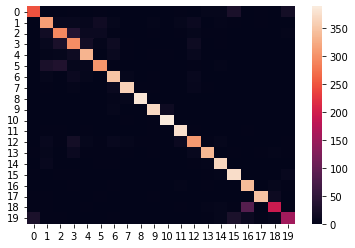

In [ ]:
from sklearn.metrics import confusion_matrix

predict = linearsvc.predict(X_test_idf_stemmed_gram)
sns.heatmap(confusion_matrix(news_test.target, predict))
# сразу видно что путаем 18 и 16 

In [ ]:
print(news_test.target_names[18], news_test.target_names[16]) # путаем подгруппы политики

talk.politics.misc talk.politics.guns


***Итоги***

**1)** LinearSVC показал себя лучше всех, лучшая accuracy 0.855 при обработке TF-IDF + stemming + ngram(1, 2) Хуже всего SVC показывает себя на обработке BOW + stemming - 0.781

**2)** LogReg занимает второе место после SVC с лучшим результатом 0.832 при обработке TF-IDF + preprocessing. Хуже всего LogReg показывает себя на обработке BOW - 0.78

**3)** KNN хуже всех. сразу было понятно, что для предсказывания текстов он не очень подходит, accuracy = 0.648

**4)** увеличение ngrams_range может повысить accuracy, но сильно увеличивает количество признаков => время на обучение. Я остановился на ngrams_range = (1, 2)

**5)** Я понял, что LinearSVC работает лучше LogReg. Это можно объяснить его функцией потерь, которая не поощеряет увеличивать отступы и для accuracy LinearSVC лучше LogReg

В первую очередь я хотел познакомиться с текстами, это у меня получилось. Также повысил accuracy у LinearSVC. Я думаю, что при более скурпулёзной обработке + увеличении ngrams_range и использовании други моделей можно поднять качество повыше, но я хотел сделать это именно с помощью LinearSVC.
